# **Baseball Player Batting Performance Analysis** <a id=0></a>
**Objective:** Shohei Ohtani is regarded one of the best playears of all time, as he is able to perform at the highest level in both pitching and hitting. He set a new record, achieving 50 home runs and 50 stolen bases in the same season. Since no player had accomplished this in over 100 years of history, it was a historic season that we may never see again in the future. The goal of this analysis is to provide suggestions and strategies to shut down this exceptionally talented player as an opposing team.

**Data Source:** https://baseballsavant.mlb.com/statcast_search?hfPT=&hfAB=&hfGT=R%7C&hfPR=&hfZ=&hfStadium=&hfBBL=&hfNewZones=&hfPull=&hfC=&hfSea=2024%7C&hfSit=&player_type=batter&hfOuts=&hfOpponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=&game_date_lt=&hfMo=&hfTeam=&home_road=&hfRO=&position=&hfInfield=&hfOutfield=&hfInn=&hfBBT=&batters_lookup%5B%5D=660271&hfFlag=&metric_1=&group_by=name&min_pitches=0&min_results=0&min_pas=0&sort_col=pitches&player_event_sort=api_p_release_speed&sort_order=desc#results

## **Key Areas of Batting Performance Analysis**
### 1. Batting AVG by Pitcher Handedness
### 2. Batting AVG Against Each Team
### 3. Batting AVG by Count
### 4. Batting AVG by Runner on base and Outs
### 5. Batting AVG Trend by Month
### 6. Batting AVG by At-Bat
### 7. Batting AVG by Pitch Location
### 8. Percentage of Hits by Pitch Type
### 9. Suggestions & Conclusion

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

In [4]:
original_df = pd.read_csv("Shohei_2024.csv")
original_df.head(3)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,FF,2024-09-29,94.3,-1.16,5.30,"Ohtani, Shohei",660271,663372,field_out,hit_into_play,...,1,0,1,Infield shade,Strategic,214.0,0.017,-0.083,69.40556,6.89529
1,CH,2024-09-29,84.8,-1.49,5.37,"Ohtani, Shohei",660271,663372,NaN,swinging_strike,...,1,0,1,Infield shade,Strategic,198.0,0.000,-0.016,78.41548,9.05790
2,FF,2024-09-29,95.4,-1.37,5.58,"Ohtani, Shohei",660271,663372,field_out,hit_into_play,...,1,0,1,Infield shade,Strategic,205.0,0.028,-0.373,68.51160,7.91156


In [5]:
# Extract columns that I need for my analysis
df = original_df[["pitch_type", "game_date", "events", "description", "zone", "p_throws", \
             "home_team", "away_team", "type", "hit_location", "bb_type", \
             "balls", "strikes", "outs_when_up", "plate_x", "plate_z", "on_3b", "on_2b", \
            "on_1b", "inning", "inning_topbot", "sz_top", "sz_bot", "pitch_name"]]
df = df.replace({"grounded_into_double_play": "double_play"})
pd.set_option('display.max_columns', None) # Display the all columns
df.head()

,pitch_type,game_date,events,description,zone,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,outs_when_up,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,sz_top,sz_bot,pitch_name
0,FF,2024-09-29,field_out,hit_into_play,14,R,COL,LAD,X,4.0,ground_ball,0,1,2,1.10,1.89,NaN,NaN,NaN,6,Top,3.45,1.59,4-Seam Fastball
1,CH,2024-09-29,NaN,swinging_strike,7,R,COL,LAD,S,NaN,NaN,0,0,2,-0.54,1.84,NaN,NaN,NaN,6,Top,3.45,1.59,Changeup
2,FF,2024-09-29,field_out,hit_into_play,4,R,COL,LAD,X,6.0,ground_ball,3,1,0,-0.81,2.35,NaN,NaN,NaN,4,Top,3.45,1.59,4-Seam Fastball
3,SL,2024-09-29,NaN,ball,13,R,COL,LAD,B,NaN,NaN,2,1,0,-1.06,2.48,NaN,NaN,NaN,4,Top,3.47,1.63,Slider
4,FF,2024-09-29,NaN,ball,12,R,COL,LAD,B,NaN,NaN,1,1,0,0.90,3.89,NaN,NaN,NaN,4,Top,3.48,1.65,4-Seam Fastball


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pitch_type     2838 non-null   object 
 1   game_date      2838 non-null   object 
 2   events         721 non-null    object 
 3   description    2838 non-null   object 
 4   zone           2838 non-null   int64  
 5   p_throws       2838 non-null   object 
 6   home_team      2838 non-null   object 
 7   away_team      2838 non-null   object 
 8   type           2838 non-null   object 
 9   hit_location   584 non-null    float64
 10  bb_type        479 non-null    object 
 11  balls          2838 non-null   int64  
 12  strikes        2838 non-null   int64  
 13  outs_when_up   2838 non-null   int64  
 14  plate_x        2838 non-null   float64
 15  plate_z        2838 non-null   float64
 16  on_3b          198 non-null    float64
 17  on_2b          442 non-null    float64
 18  on_1b   

In [7]:
df.isnull().sum()

pitch_type          0
game_date           0
events           2117
description         0
zone                0
p_throws            0
home_team           0
away_team           0
type                0
hit_location     2254
bb_type          2359
balls               0
strikes             0
outs_when_up        0
plate_x             0
plate_z             0
on_3b            2640
on_2b            2396
on_1b            1978
inning              0
inning_topbot       0
sz_top              0
sz_bot              0
pitch_name          0
dtype: int64

In [8]:
df = df.copy()
df.fillna("None", inplace=True)

In [9]:
df.isnull().sum()

pitch_type       0
game_date        0
events           0
description      0
zone             0
p_throws         0
home_team        0
away_team        0
type             0
hit_location     0
bb_type          0
balls            0
strikes          0
outs_when_up     0
plate_x          0
plate_z          0
on_3b            0
on_2b            0
on_1b            0
inning           0
inning_topbot    0
sz_top           0
sz_bot           0
pitch_name       0
dtype: int64

## 1. Batting AVG by Pitcher Handedness

In [11]:
df["events"].unique()

array(['field_out', 'None', 'single', 'walk', 'home_run', 'double',
       'strikeout', 'hit_by_pitch', 'force_out', 'fielders_choice',
       'double_play', 'triple', 'sac_fly', 'catcher_interf',
       'field_error'], dtype=object)

In [12]:
avg_handedness = df.groupby(["p_throws", "events"])[["events"]].count().rename(columns={"events":"count"}).reset_index()

# Calculate at-bats and hits against left-handed pitchers
l_at_bat = avg_handedness[(avg_handedness["p_throws"] == "L") & ~((avg_handedness["events"] == "None")|
                                                                (avg_handedness["events"] == "walk")|
                                                                (avg_handedness["events"] == "hit_by_pitch")|
                                                                (avg_handedness["events"] == "sac_fly")|
                                                                (avg_handedness["events"] == "catcher_interf"))]["count"].sum()
                                                                 
l_hits = avg_handedness[(avg_handedness["p_throws"]== "L") & ((avg_handedness["events"] == "single")| 
                                                              (avg_handedness["events"] == "double")| 
                                                              (avg_handedness["events"] == "triple")| 
                                                              (avg_handedness["events"] == "home_run"))]["count"].sum()
# Calculate at-bats and hits against right-handed pitchers
r_at_bat = avg_handedness[(avg_handedness["p_throws"] == "R") & ~((avg_handedness["events"] == "None")|
                                                                (avg_handedness["events"] == "walk")|
                                                                (avg_handedness["events"] == "hit_by_pitch")|
                                                                (avg_handedness["events"] == "sac_fly")|
                                                                (avg_handedness["events"] == "catcher_interf"))]["count"].sum()

r_hits = avg_handedness[(avg_handedness["p_throws"]== "R") & ((avg_handedness["events"] == "single")| 
                                                              (avg_handedness["events"] == "double")| 
                                                              (avg_handedness["events"] == "triple")| 
                                                              (avg_handedness["events"] == "home_run"))]["count"].sum()

# Calculate the total at-bats and hits for this season
total_at_bat = l_at_bat + r_at_bat

total_hit = l_hits + r_hits

In [13]:
def calculate_ave(x:int, y:int): # x = at_bat, y = hits
    return round(y / x, 3)

In [14]:
t = calculate_ave(total_at_bat, total_hit)
print(f"At-bats: {total_at_bat}, Hits: {total_hit}, Batting AVG (Season): {t:.3f}")
l = calculate_ave(l_at_bat, l_hits)
print(f"At-bats: {l_at_bat}, Hits: {l_hits}, Batting AVG (Left-handed): {l}")
r = calculate_ave(r_at_bat, r_hits)
print(f"At-bats: {r_at_bat}, Hits: {r_hits}, Batting AVG (Right-handed): {r}")

At-bats: 636, Hits: 197, Batting AVG (Season): 0.310
At-bats: 226, Hits: 65, Batting AVG (Left-handed): 0.288
At-bats: 410, Hits: 132, Batting AVG (Right-handed): 0.322


In [15]:
results = pd.DataFrame({"at_bats": [total_at_bat, l_at_bat, r_at_bat],
             "hits": [total_hit, l_hits, r_hits],
             "avg": [t, l, r]},
            index = ["Season", "Left", "Right"])
results

,at_bats,hits,avg
Season,636,197,0.310
Left,226,65,0.288
Right,410,132,0.322


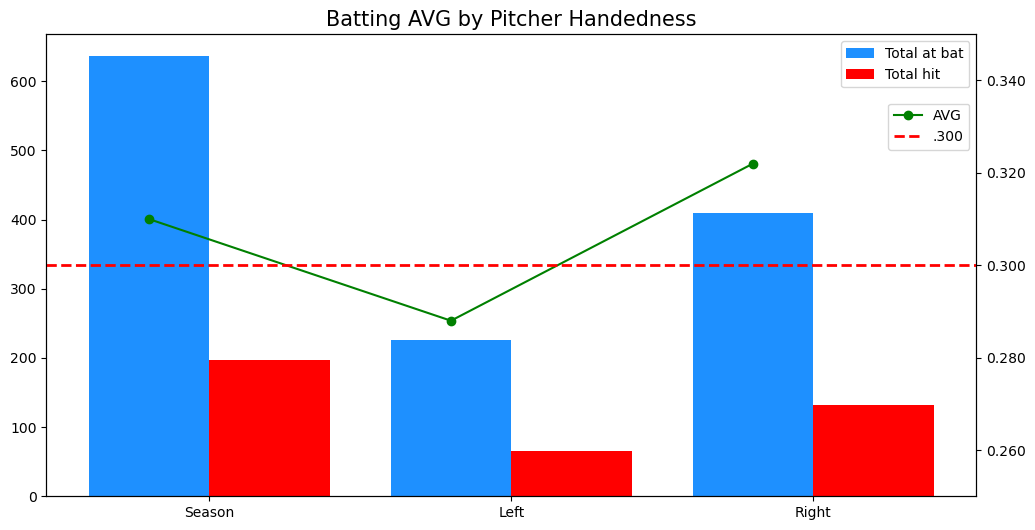

In [150]:
location = np.arange(len(results.index))
gap = 0.4
plt.figure(figsize=(12,6))
plt.bar(location, results["at_bats"], width=0.4, color="dodgerblue", label="total at bats")
plt.bar(location + gap, results["hits"], width=0.4, color="red", label="total hits")
label = ["Total at bat", "Total hit"]
plt.legend(loc="upper right", labels=label)

results["avg"].plot(kind="line", style='o-', c='green', secondary_y=True)
y_formatter = FormatStrFormatter('%.3f')
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.ylim(0.25, 0.35)
plt.title("Batting AVG by Pitcher Handedness", fontsize=15)

a = 0.3
plt.axhline(a, linestyle='--', color='r', linewidth=2)
plt.xticks([0.2,1.2,2.2], labels=results.index)
plt.legend(loc="right", bbox_to_anchor=(1,0.80), labels=["AVG", ".300"])
plt.show()

### **Insights**
* **He relatively recorded high batting average against both right-handed (.322) and left-handed (.288) pitcher. (Players with their batting average over .300 are considered great hitters in general.)**
* **While his batting average against left-handed is lower, but it is hard to say that he struggled against them.**

In [153]:
events = avg_handedness.drop(index=[0,14], axis=0)
left_events = events[events["p_throws"] == "L"].sort_values(by="count", ascending=False).reset_index(drop=True)
left_others = pd.DataFrame(data={"p_throws": "L", "events": "others", "count": left_events.iloc[8:]["count"].sum()}, index=[7])
left = pd.concat([left_events, left_others]).drop([8,9,10,11,12], axis=0).reset_index(drop=True)
left

,p_throws,events,count
0,L,field_out,90
1,L,strikeout,58
2,L,single,39
3,L,walk,20
4,L,double,12
5,L,home_run,12
6,L,force_out,6
7,L,double_play,4
8,L,others,8


In [19]:
right_events = events[events["p_throws"] == "R"].sort_values(by="count", ascending=False).reset_index(drop=True)
right_others = pd.DataFrame(data={"p_throws": "R", "events": "others", "count": right_events.iloc[9:]["count"].sum()}, index=[8])
right = pd.concat([right_events, right_others]).drop([9,10,11,12,13], axis=0).reset_index(drop=True)
right

,p_throws,events,count
0,R,field_out,161
1,R,strikeout,104
2,R,single,59
3,R,walk,51
4,R,home_run,42
5,R,double,26
6,R,force_out,8
7,R,triple,5
8,R,hit_by_pitch,4
9,R,others,12


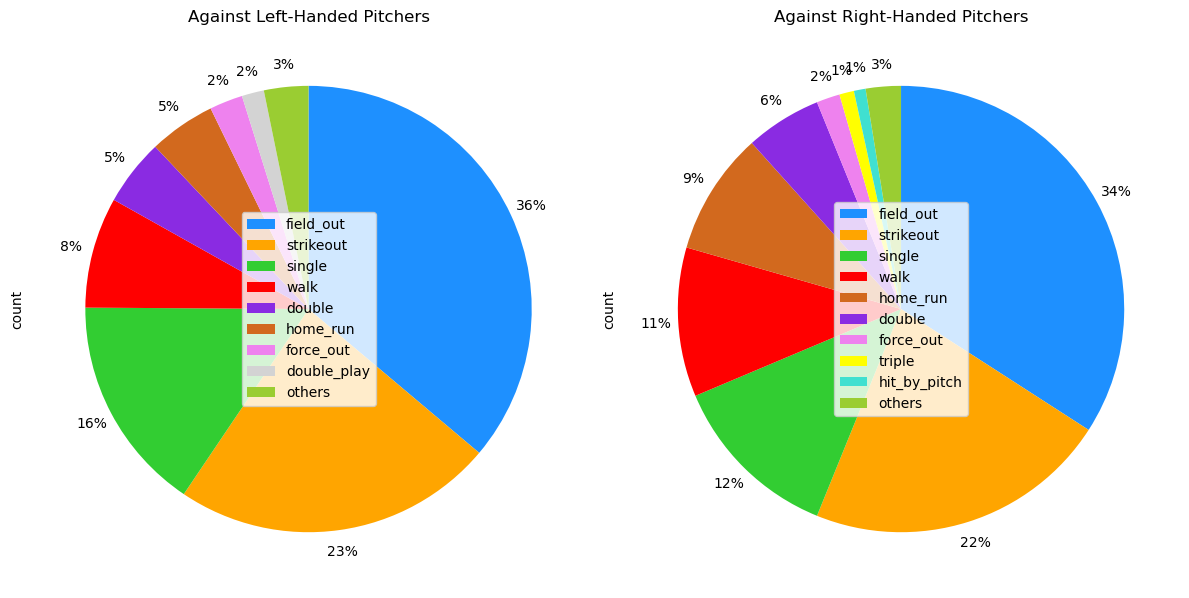

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))
colors_left = ["dodgerblue", "orange", "limegreen", "red", "blueviolet", "chocolate", "violet", "lightgray", "yellowgreen"]
left.plot(kind="pie", y="count", counterclock = False, startangle=90, autopct='%1.0f%%', labels=None, ax=axes[0], colors=colors_left, pctdistance=1.1)
axes[0].set_title("Against Left-Handed Pitchers")
axes[0].legend(labels=left["events"], loc="center")

colors_right = ["dodgerblue", "orange", "limegreen", "red", "chocolate", "blueviolet", "violet", "yellow", "turquoise", "yellowgreen"]
right.plot(kind="pie", y="count", counterclock = False, startangle=90, autopct='%1.0f%%', labels=None, ax=axes[1], colors=colors_right, pctdistance=1.1)
axes[1].set_title("Against Right-Handed Pitchers")
axes[1].legend(labels=right["events"], loc="center")

plt.tight_layout()
plt.show()

### **Insights**
* **The distribution of events is not significantly different between right- and left-handed pitchers.**
* **There is a higher chance that left-handed pitchers induce groundouts with runners on base, considering the percentage of double plays against lefties is higher, even though the total at-bats were 1.8 times fewer than against right-handed pitchers.**
* **Seventy-five percent of the events against lefties resulted in outs or singles, and this figure increases to 83% when including walks. Given these numbers, the risk of giving up runs decreases if the manager has lefties face him with runners in scoring positions.**

## 2. Batting AVG Against Each Team

In [24]:
avg_home = df[(df["home_team"] != "LAD") & (df["events"] != "None")]
avg_home = avg_home.groupby(["home_team", "events"])[["events"]].count().rename(columns={"events":"count"}).reset_index()
avg_home = pd.pivot_table(avg_home, values="count", index = ["home_team"], columns="events", aggfunc="first").fillna(0).astype(int)
avg_home["total_hit"] = avg_home[["single", "double", "triple", "home_run"]].sum(axis=1)
avg_home["total_at_bat"] = avg_home["total_hit"] + avg_home[["double_play", "field_out", "strikeout", "force_out", "fielders_choice", "field_error"]].sum(axis=1)
avg_home.head()

events,double,double_play,field_error,field_out,fielders_choice,force_out,hit_by_pitch,home_run,sac_fly,single,strikeout,triple,walk,total_hit,total_at_bat
home_team,,,,,,,,,,,,,,,
ATL,2,0,0,3,1,1,0,0,0,0,7,0,2,2,14
AZ,1,1,0,6,0,1,1,2,1,5,10,0,3,8,26
CHC,2,0,0,5,0,0,0,1,0,2,2,1,1,6,13
CIN,0,0,0,6,0,1,0,0,0,1,4,1,0,2,13
COL,4,0,0,15,0,0,0,3,0,8,2,0,3,15,32


In [25]:
avg_away = df[(df["home_team"] == "LAD") & (df["events"] != "None")]
avg_away = avg_away.groupby(["away_team", "events"])[["events"]].count().rename(columns={"events":"count"}).reset_index()
avg_away = pd.pivot_table(avg_away, values="count", index = ["away_team"], columns="events", aggfunc="first").fillna(0).astype(int)
avg_away["total_hit"] = avg_away[["single", "double", "triple", "home_run"]].sum(axis=1)
avg_away["total_at_bat"] = avg_away["total_hit"] + avg_away[["double_play", "field_out", "strikeout", "force_out", "field_error"]].sum(axis=1)
avg_away.head()

events,catcher_interf,double,double_play,field_error,field_out,force_out,hit_by_pitch,home_run,sac_fly,single,strikeout,triple,walk,total_hit,total_at_bat
away_team,,,,,,,,,,,,,,,
ATL,0,0,0,0,2,0,0,3,0,5,2,0,2,8,12
AZ,0,2,0,1,8,0,0,1,0,4,7,0,2,7,23
BAL,0,0,0,0,5,1,0,1,0,3,3,0,0,4,13
BOS,0,2,0,0,4,0,0,1,0,0,4,0,1,3,11
CHC,0,0,1,0,6,0,0,1,0,3,1,0,2,4,12


In [26]:
avg_team = pd.concat([avg_home, avg_away], axis=0)
avg_team = avg_team.groupby(avg_team.index)[avg_team.columns].sum().drop("catcher_interf", axis=1)
avg_team["avg"] = (avg_team["total_hit"] / avg_team["total_at_bat"]).round(3)
avg_team = avg_team.sort_values(by=["avg"], ascending=False)
avg_team.head()

events,double,double_play,field_error,field_out,fielders_choice,force_out,hit_by_pitch,home_run,sac_fly,single,strikeout,triple,walk,total_hit,total_at_bat,avg
COL,4,0,0,21,0.0,0,1,5,0,15,8,0,6,24,53,0.453
MIA,2,0,0,7,0.0,0,0,5,0,3,8,0,3,10,25,0.400
CHC,2,1,0,11,0.0,0,0,2,0,5,3,1,3,10,25,0.400
KC,0,1,0,5,0.0,0,0,2,0,2,0,0,2,4,10,0.400
HOU,1,0,0,4,0.0,0,0,1,0,2,2,0,4,4,10,0.400


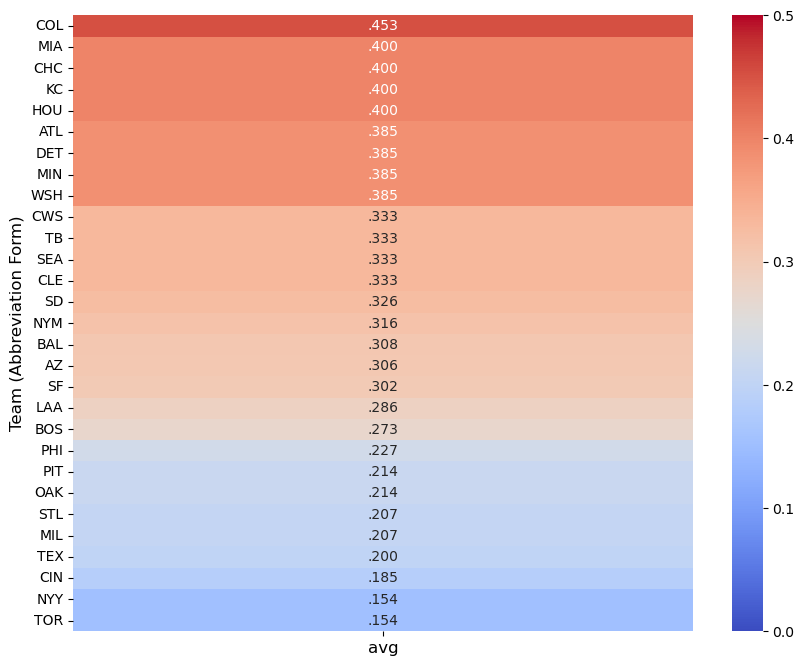

In [234]:
def format_numbers(ave):
    return f"{ave:.3f}".lstrip("0")
formatted_values = avg_team["avg"].apply(format_numbers).values.reshape(-1, 1)

fig = plt.figure(figsize=(10, 8))
sns.heatmap(avg_team[["avg"]], vmax=0.5, vmin=0, annot=formatted_values, cmap="coolwarm", fmt="s")
plt.xticks(fontsize=12)
plt.xlabel(None)
plt.ylabel("Team (Abbreviation Form)", fontsize=12)
plt.show()

### **Insights**
* **Coors Field in Colorado has been known as the most hitter friendly ballpark, which is one reason his batting average against Rockies was close to .500.**
* **His batting average is over .300 against all the teams in the same division even though he has faced them more times than other teams.** 
* **He performed at a high level overall, as his batting average is over .300 against 19 out of 29 teams.**  

## 3. Batting AVG by Count

In [31]:
count_result = df.groupby(["balls", "strikes"])["events"].value_counts()

s0_b0 = count_result[0,0]
s0_b1 = count_result[1,0]
s0_b2 = count_result[2,0]
s0_b3 = count_result[3,0]
s1_b0 = count_result[0,1]
s1_b1 = count_result[1,1]
s1_b2 = count_result[2,1]
s1_b3 = count_result[3,1]
s2_b0 = count_result[0,2]
s2_b1 = count_result[1,2]
s2_b2 = count_result[2,2]
s2_b3 = count_result[3,2]

list3 = {'s0_b0':s0_b0, 's0_b1':s0_b1, 's0_b2':s0_b2, 's0_b3':s0_b3, 's1_b0':s1_b0, 's1_b1':s1_b1, 
         's1_b2':s1_b2, 's1_b3':s1_b3, 's2_b0':s2_b0, 's2_b1':s2_b1, 's2_b2':s2_b2, 's2_b3':s2_b3}

columns3 = ['s0_b0', 's0_b1', 's0_b2', 's0_b3', 's1_b0', 's1_b1', 's1_b2', 's1_b3', 's2_b0', 's2_b1', 's2_b2', 's2_b3']

index3 = ['single', 'double', 'triple', 'home_run', 'double_play', 'field_out','strikeout', 'force_out', 
          'fielders_choice', 'field_error', 'catcher_interf', 'hit_by_pitch', 'walk', 'sac_fly']

count_result = pd.DataFrame(data=list3, index=index3, columns=columns3).transpose().fillna(0).astype(int)
count_result.head()

,single,double,triple,home_run,double_play,field_out,strikeout,force_out,fielders_choice,field_error,catcher_interf,hit_by_pitch,walk,sac_fly
s0_b0,14,9,1,8,3,42,0,2,1,2,1,2,0,2
s0_b1,8,3,0,8,0,17,0,2,0,0,0,0,0,1
s0_b2,2,2,0,3,0,5,0,0,0,0,0,0,0,0
s0_b3,0,1,0,1,0,0,0,0,0,0,0,0,15,0
s1_b0,13,4,1,4,0,39,0,3,0,0,0,0,0,1


In [32]:
count_result["total_hit"] = count_result[["single", "double", "triple", "home_run"]].sum(axis=1)
count_result["total_at_bat"] = count_result["total_hit"] + count_result[["double_play", "field_out", "strikeout",
                                                                         "force_out", "fielders_choice", "field_error"]].sum(axis=1)
count_result["avg"] = (count_result["total_hit"] / count_result["total_at_bat"]).round(3)
total_bat = count_result["total_at_bat"] + (count_result[["walk", "hit_by_pitch", "sac_fly"]]).sum(axis=1)
count_result["obp"] = ((count_result["total_hit"] + (count_result[["walk", "hit_by_pitch"]]).sum(axis=1)) / total_bat).round(3)

def calculate_total_base(a:int,b:int,c:int,d:int):
    return (a * 1) + (b * 2) + (c * 3) + (d * 4)

count_result["slg"] = (calculate_total_base(count_result["single"], count_result["double"], count_result["triple"], count_result["home_run"]) / total_bat).round(3)
count_result["ops"] = count_result["obp"] + count_result["slg"]
count_result.head()

,single,double,triple,home_run,double_play,field_out,strikeout,force_out,fielders_choice,field_error,catcher_interf,hit_by_pitch,walk,sac_fly,total_hit,total_at_bat,avg,obp,slg,ops
s0_b0,14,9,1,8,3,42,0,2,1,2,1,2,0,2,32,82,0.390,0.395,0.779,1.174
s0_b1,8,3,0,8,0,17,0,2,0,0,0,0,0,1,19,38,0.500,0.487,1.179,1.666
s0_b2,2,2,0,3,0,5,0,0,0,0,0,0,0,0,7,12,0.583,0.583,1.500,2.083
s0_b3,0,1,0,1,0,0,0,0,0,0,0,0,15,0,2,2,1.000,1.000,0.353,1.353
s1_b0,13,4,1,4,0,39,0,3,0,0,0,0,0,1,22,64,0.344,0.338,0.615,0.953


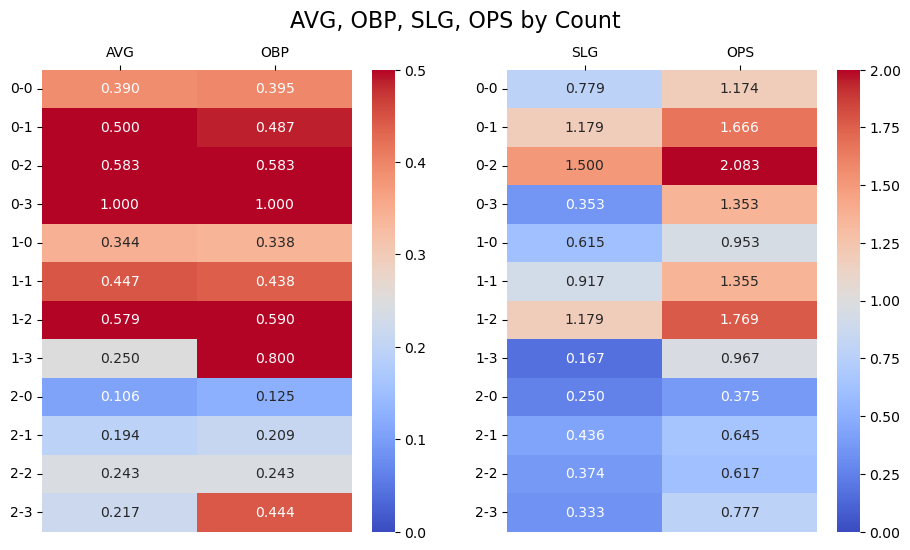

In [320]:
plt.figure(figsize=(11,6))
count = ["0-0", "0-1", "0-2", "0-3", "1-0", "1-1", "1-2", "1-3", "2-0", "2-1", "2-2", "2-3"]
plt.suptitle("AVG, OBP, SLG, OPS by Count", fontsize=16)
plt.subplot(1,2,1)
sns.heatmap(count_result[["avg", "obp"]], vmax=0.5, vmin=0, annot=True, cmap="coolwarm", fmt=".3f")
my_xticks = ["AVG", "OBP"]
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xticks((0.5, 1.5), my_xticks)
plt.yticks(np.arange(len(count))+0.5, count)

plt.subplot(1,2,2)
sns.heatmap(count_result[["slg", "ops"]], vmax=2, vmin=0, annot=True, cmap="coolwarm", fmt=".3f")
xticks = ["SLG", "OPS"]
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xticks((0.5, 1.5), xticks)
plt.yticks(np.arange(len(count))+0.5, count)

plt.show()

### **Insights**
* **He tends to swing at the first pitch and has a higher batting average when he does so, at .390.**
* **He obiously gets a high batting average earliy in the count, while it tends to be lower when he is in a two-strike count.**
* **0 strike 2 balls is the most favorable count for him, as AVG, SLG and OPS are incredibly high. (Pitchers have to carefully choose the next pitch that they throw)**
* **These numbers are considered decent performance for a leading-hitter. His challenge is how to handle being in a two-strike count.**

## 4. Batting AVG by Runner on base and Outs

In [37]:
df[["on_1b", "on_2b", "on_3b"]] = df[["on_1b", "on_2b", "on_3b"]].replace("None", 0).astype(int)
df[["on_1b", "on_2b", "on_3b"]] = df[["on_1b", "on_2b", "on_3b"]].mask(df[["on_1b", "on_2b", "on_3b"]] != 0, 1)

In [38]:
df_runner = df.groupby(["on_1b", "on_2b", "on_3b", "outs_when_up", "events"])[["events"]].count().rename(columns={"events":"count"}).reset_index(level=4)
df_runner = df_runner[df_runner["events"] != "None"]
df_runner = pd.pivot_table(df_runner, values='count', index=["on_1b", "on_2b", "on_3b", "outs_when_up"], columns='events', aggfunc='first').fillna(0).astype(int)

df_runner["total_hit"] = df_runner[["single", "double", "triple", "home_run"]].sum(axis=1)
df_runner["total_at_bat"] = df_runner["total_hit"] + df_runner[["double_play", "field_out", "strikeout",
                                                                         "force_out", "fielders_choice", "field_error"]].sum(axis=1)
df_runner["avg"] = (df_runner["total_hit"] / df_runner["total_at_bat"]).round(3)
df_runner.head()

events                          catcher_interf  double  double_play  \
on_1b on_2b on_3b outs_when_up                                        
0     0     0     0                          2      13            0   
                  1                          0       6            0   
                  2                          0       2            0   
            1     0                          0       1            0   
                  1                          0       1            0   

events                          field_error  field_out  fielders_choice  \
on_1b on_2b on_3b outs_when_up                                            
0     0     0     0                       1         74                0   
                  1                       2         47                0   
                  2                       0         30                0   
            1     0                       0          3                0   
                  1                       0          2                0   

events                          force_out  hit_by_pitch  home_run  sac_fly  \
on_1b on_2b on_3b outs_when_up                                               
0     0     0     0                     0             1        17        0   
                  1                     0             1        10        0   
                  2                     0             1         5        0   
            1     0                     0             0         0        0   
                  1                     0             0         0        1   

events                          single  strikeout  triple  walk  total_hit  \
on_1b on_2b on_3b outs_when_up                                               
0     0     0     0                 27         40       1    19         58   
                  1                 19         50       2    13         37   
                  2                 12         15       3     8         22   
            1     0                  0          0       0     0          1   
                  1                  1          0       0     0          2   

events                          total_at_bat    avg  
on_1b on_2b on_3b outs_when_up                       
0     0     0     0                      173  0.335  
                  1                      136  0.272  
                  2                       67  0.328  
            1     0                        4  0.250  
                  1                        4  0.500

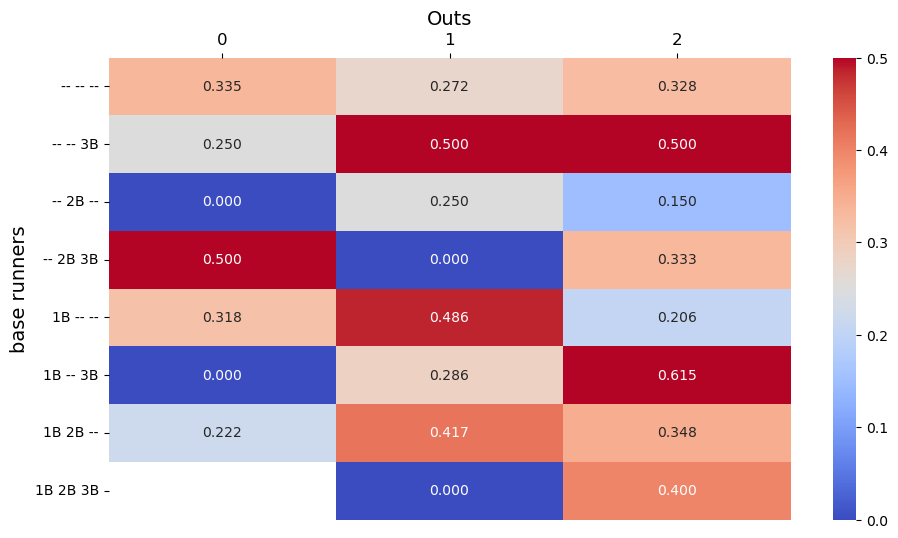

In [284]:
avg_runner = df_runner[["avg"]].reset_index(level=3)
avg_runner = pd.pivot_table(avg_runner, values='avg', index=["on_1b", "on_2b", "on_3b"], columns='outs_when_up', aggfunc='first')
plt.figure(figsize=(11,6))
sns.heatmap(avg_runner, vmax=0.5, vmin=0, annot=avg_runner, cmap="coolwarm", fmt=".3f")
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.title("Outs", fontsize=14)
plt.xlabel(None)
plt.ylabel("base runners", fontsize=14)
plt.xticks(fontsize=12)
my_yticks = ["-- -- --", "-- -- 3B", "-- 2B --", "-- 2B 3B", "1B -- --", "1B -- 3B", "1B 2B --", "1B 2B 3B"]
plt.yticks(np.arange(len(my_yticks))+0.5, my_yticks, rotation=360)
plt.show()

### **Insights**
* **With 1 out and a runner on 1B, he has a high batting average of .486, and his home run percentage is relatively high at .333.**
* **With 2 outs and a runner on 2B, he has a low batting average of .150, while his strikeout percentage is high at .350.**
* **He hits well in most situations, but his batting average is relatively low when there is only a runner on second base.**

## 5. Batting AVG Trend by Month

In [43]:
df["month"] = df["game_date"].apply(lambda x: x.split("-")[1])
avg_month = df.groupby(["month", "events"])[["events"]].count().rename(columns={"events":"count"}).reset_index(level=1)
avg_month = pd.pivot_table(avg_month, values="count", index = ["month"], columns="events", aggfunc="first").fillna(0).astype(int)
avg_month = avg_month.drop("None", axis=1)
avg_month["total_hit"] = avg_month[["single", "double", "triple", "home_run"]].sum(axis=1)
avg_month["total_at_bat"] = avg_month["total_hit"] + avg_month[["double_play", "field_out", "strikeout",
                                                                         "force_out", "fielders_choice", "field_error"]].sum(axis=1)
avg_month["avg"] = (avg_month["total_hit"] / avg_month["total_at_bat"]).round(3)
avg_month

events,catcher_interf,double,double_play,field_error,field_out,fielders_choice,force_out,hit_by_pitch,home_run,sac_fly,single,strikeout,triple,walk,total_hit,total_at_bat,avg
month,,,,,,,,,,,,,,,,,
03,0,2,1,0,10,0,2,0,0,1,5,6,0,2,7,26,0.269
04,1,12,3,1,39,0,3,0,7,1,17,22,1,13,37,105,0.352
05,0,3,0,1,37,0,4,1,7,0,18,22,1,10,29,93,0.312
06,1,4,2,0,40,1,1,1,12,1,13,26,0,16,29,99,0.293
07,0,7,0,0,31,0,1,1,6,0,11,33,2,14,26,91,0.286
08,1,2,0,1,59,0,2,2,12,2,11,26,2,6,27,115,0.235
09,0,8,1,0,35,1,1,1,10,0,23,27,1,10,42,107,0.393


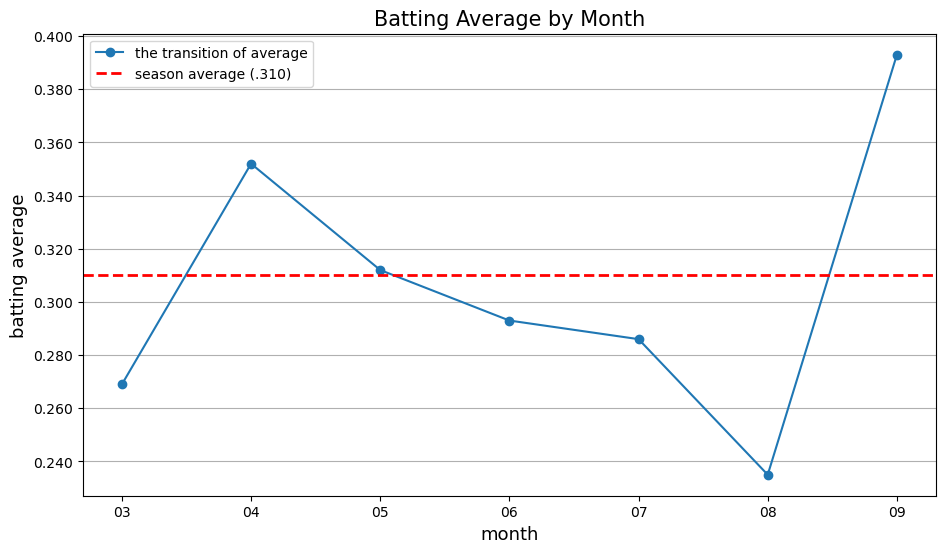

In [44]:
mean_ave = (avg_month["total_hit"].sum() / avg_month["total_at_bat"].sum()).round(3)
plt.figure(figsize=(11,6))
plt.plot(avg_month['avg'], marker='o')
plt.axhline(mean_ave, linestyle='--', color='r', linewidth=2)
plt.title('Batting Average by Month', fontsize=15)
plt.xlabel('month', fontsize=13)
plt.ylabel('batting average', fontsize=13)
labels = ['the transition of average', 'season average (.310)']
y_formatter = FormatStrFormatter('%.3f')
plt.gca().yaxis.set_major_formatter(y_formatter)
plt.legend(labels = labels,loc='upper left')
plt.grid(axis="y")
plt.show()

### **Insights**
* **He has tended to be in good shape in June over the past 2-3 years, but his batting average has gradually decreased since April.**
* **Due to Mookie Betts going on the injured list in June, his batting lineup has fluctuated, which could be a reason for his hitting slump.**
* **His total hits and total home run in August were not too bad numbers compared to other monthes, but the total number of walk is relatively low, which means it is possible that he was caught in a bad cycle of swinging at pitches outside the strike zone and getting out.**
* **One possible factor for the significant increase in his batting average in September is that he was able to really focus on every at-bat, driven by the goal of winning the division championship and clinching a postseason berth for the first time in his career.**

## 6. Batting AVG by At-Bat

In [48]:
avg_at_bat = df.groupby(["game_date", "inning", "events"])[["events"]].count().rename(columns={"events":"count"}).reset_index()
avg_at_bat = avg_at_bat[avg_at_bat["events"] != "None"]
avg_at_bat["at_bat"] = avg_at_bat.groupby("game_date").cumcount()+1
avg_at_bat = avg_at_bat.groupby(["at_bat", "events"])[["events"]].count().rename(columns={"events":"count"}).reset_index()
avg_at_bat = pd.pivot_table(avg_at_bat, values='count', index=["at_bat"], columns='events', aggfunc='first').fillna(0).astype(int)
avg_at_bat["total_hit"] = avg_at_bat[["single", "double", "triple", "home_run"]].sum(axis=1)
avg_at_bat["total_at_bat"] = avg_at_bat["total_hit"] + avg_at_bat[["double_play", "field_out", "strikeout", "force_out", "fielders_choice", "field_error"]].sum(axis=1)
avg_at_bat["avg"] = (avg_at_bat["total_hit"] / avg_at_bat["total_at_bat"]).round(3)
avg_at_bat

events,catcher_interf,double,double_play,field_error,field_out,fielders_choice,force_out,hit_by_pitch,home_run,sac_fly,single,strikeout,triple,walk,total_hit,total_at_bat,avg
at_bat,,,,,,,,,,,,,,,,,
1,0,9,1,2,58,0,2,0,11,0,20,37,1,18,41,141,0.291
2,1,4,4,0,56,0,1,2,12,3,18,35,2,21,36,132,0.273
3,1,12,2,0,53,0,3,1,13,0,28,31,2,13,55,144,0.382
4,1,8,0,1,54,2,5,2,8,1,20,37,2,12,38,137,0.277
5,0,4,0,0,23,0,2,1,9,1,12,20,0,7,25,70,0.357
6,0,1,0,0,6,0,1,0,1,0,0,2,0,0,2,11,0.182


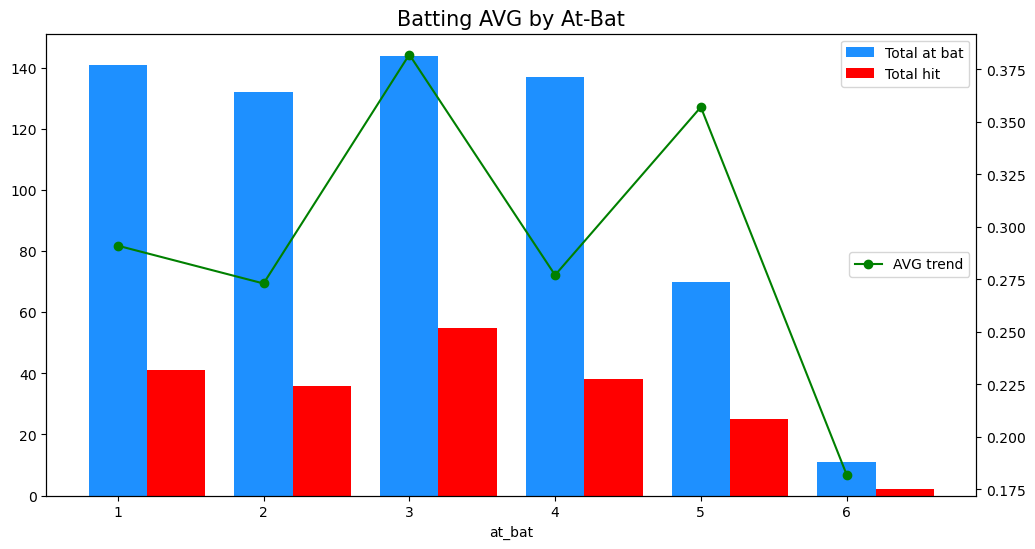

In [49]:
position = np.arange(len(avg_at_bat.index))+1
width = 0.4
plt.figure(figsize=(12,6))
plt.bar(position, avg_at_bat["total_at_bat"], width=0.4, color="dodgerblue", label="total at bat")
plt.bar(position + width, avg_at_bat["total_hit"], width=0.4, color="red", label="total hit")
label = ["Total at bat", "Total hit"]
plt.legend(loc="upper right", labels=label)

avg_at_bat["avg"].plot(kind="line", style='o-', c='green', secondary_y=True)
plt.legend(loc="center right", labels=["AVG trend"])

plt.title("Batting AVG by At-Bat", fontsize=15)
plt.show()

### **Insights**
* **At his first at-bat, his batting average is below .300, which is not ideal number for a leading hitter.** 
* **The percentage of home run at fifth at-bat is relatively high, considering his fewer total at-bat.**
* **The total number of hits and all the different types of hits (single, double, triple, home run) are the highest in his third at-bat, even though the total number of at-bat is also the highest. There is a possibility that his third at-bat is the most comfortable for him, given the situation of the game (example: adapting as his body and eyes become accustomed as the game goes on, facing the same pitcher multiple times).** 

## 7. Batting AVG by Pitch Location

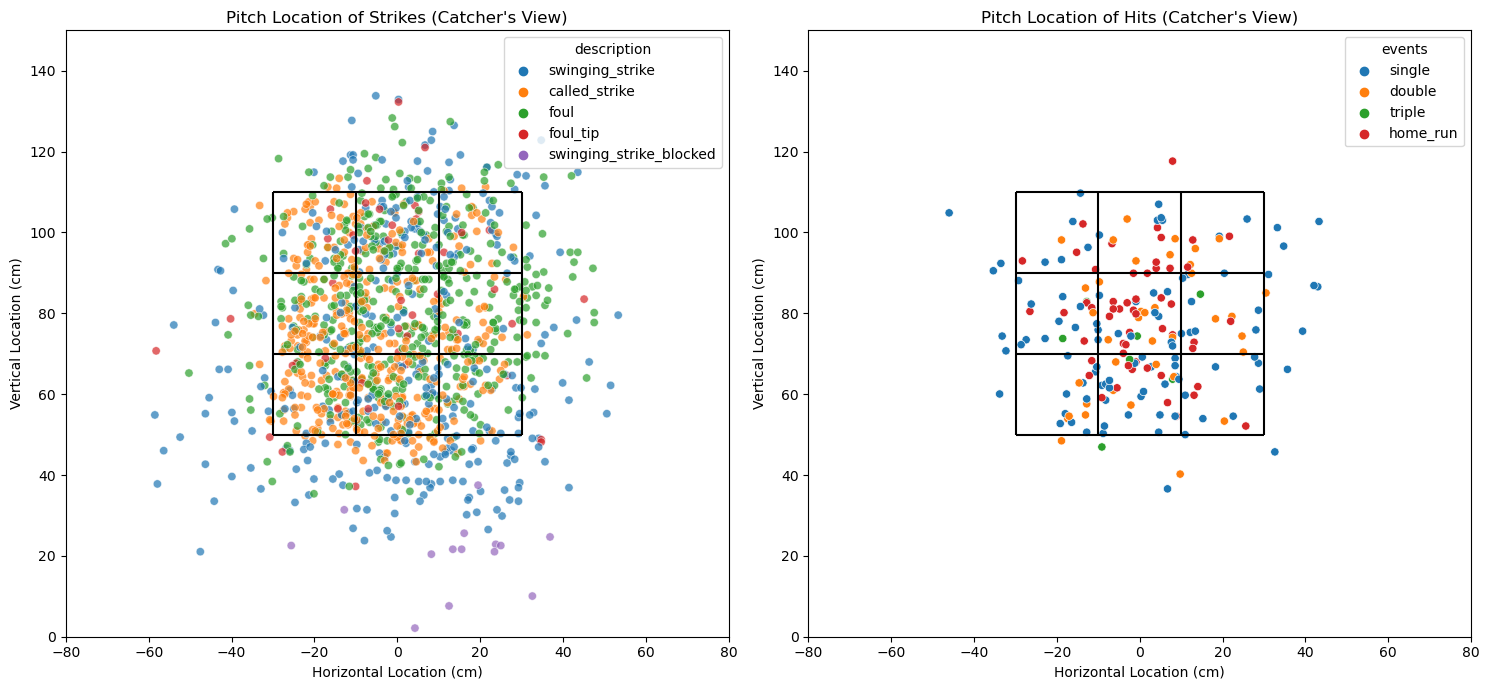

In [53]:
df['plate_x_cm'] = df['plate_x'] * 30.48
df['plate_z_cm'] = df['plate_z'] * 30.48

strikes = df[df["type"] == "S"]
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.scatterplot(x=strikes["plate_x_cm"], y=strikes["plate_z_cm"], color="goldenrod", hue=strikes["description"], alpha=0.7)
plt.xlim(-80, 80)
plt.ylim(0, 150)
plt.hlines(y=[50, 70, 90, 110], xmin=-30, xmax=30, color="black")
plt.vlines(x=[-30, -10, 10, 30], ymin=50, ymax=110, color="black")
plt.title("Pitch Location of Strikes (Catcher's View)")
plt.xlabel("Horizontal Location (cm)")
plt.ylabel("Vertical Location (cm)")

plt.subplot(1,2,2)
hits = df[(df["events"] == "single") | (df["events"] == "double") | \
               (df["events"] == "triple") | (df["events"] == "home_run")].reset_index(drop=True)
hits['events'] = pd.Categorical(hits['events'], categories=["single", "double", "triple", "home_run"], ordered=True)
sns.scatterplot(x=hits["plate_x_cm"], y=hits["plate_z_cm"], color="goldenrod", hue=hits["events"])
plt.xlim(-80, 80)
plt.ylim(0, 150)
plt.hlines(y=[50, 70, 90, 110], xmin=-30, xmax=30, color="black")
plt.vlines(x=[-30, -10, 10, 30], ymin=50, ymax=110, color="black")
plt.title("Pitch Location of Hits (Catcher's View)")
plt.xlabel("Horizontal Location (cm)")
plt.ylabel("Vertical Location (cm)")

plt.tight_layout()
plt.show()

### **Insights**
* **He tends not to swing at pitches on the outside corner. (The points (called strike) are relatively gathered on the outside corner.)**
* **In the hits graph, the plots are relatively gathered in the center of the zone, but there are no significant biases.**
* **He was able to hit home runs on pitches located in all areas, with a high probability that pitches in the center of the zone result in home runs.**

In [55]:
all_eve = df[~((df["events"] == "None") | (df["events"] == "sac_fly") | (df["events"] == "hit_by_pitch") | \
               (df["events"] == "walk") | (df["events"] == "catcher_interf"))].reset_index(drop=True)
def calculation(data):
    loc = [[0,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0]]
    for height, side in zip(data["plate_z_cm"], data["plate_x_cm"]):
        if height < 30 or 130 < height:
            continue
        if side < -50 or 50 < side:
            continue
        # vertical location
        if 110 < height <= 130:
            h=0
        elif 90 < height <= 110:
            h=1
        elif 70 < height < 90:
            h=2
        elif 50 < height <= 70:
            h=3
        elif 30 < height <= 50:
            h=4
        # horizontal location
        if -50 <= side < -30:
            s=0
        elif -30 <= side < -10:
            s=1
        elif -10 <= side < 10:
            s=2
        elif 10 <= side < 30:
            s=3
        elif 30 <= side < 50:
            s=4
        loc[h][s] += 1
    return loc

In [56]:
loc = calculation(all_eve)
loc

[[0, 7, 11, 4, 2],
 [8, 40, 50, 37, 8],
 [8, 56, 77, 49, 14],
 [9, 51, 87, 37, 3],
 [4, 12, 17, 18, 4]]

In [57]:
loc_hits = calculation(hits)
loc_hits

[[0, 0, 1, 0, 0],
 [3, 10, 16, 8, 3],
 [2, 21, 37, 18, 5],
 [1, 17, 37, 11, 1],
 [0, 1, 3, 1, 1]]

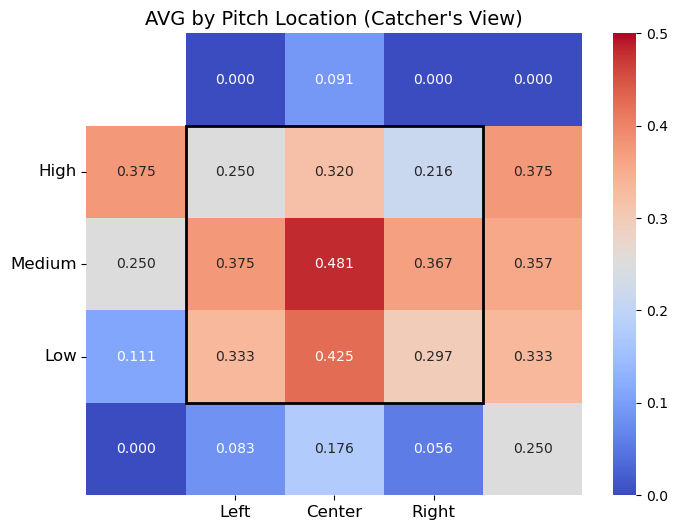

In [58]:
arr = (np.array(loc_hits) / np.array(loc)).round(3)
avg_location = arr.tolist()
plt.figure(figsize=(8,6))
ax = sns.heatmap(avg_location, vmax=0.5, vmin=0, annot=True, cmap="coolwarm", fmt=".3f")
ax.add_patch(Rectangle((1, 1), 3, 3, fill=False, edgecolor='black', linewidth=2))
plt.title("AVG by Pitch Location (Catcher's View)", fontsize=14)
x = ["Left", "Center", "Right"]
plt.xticks([1.5,2.5,3.5], x, fontsize=12)
y = ["High", "Medium", "Low"]
plt.yticks([1.5,2.5,3.5], y, fontsize=12, rotation=360)
plt.show()

### **Insights**
* **He excels at handling pitches on the inside corner.**
* **His batting average on high pitches outside the strike zone is quite low, but he rarely attempts to hit these pitches.**
* **The center of the vertical line represents the locations that pitchers try to avoid when pitching.**

## 8. Percentage of Hits by Pitch Type

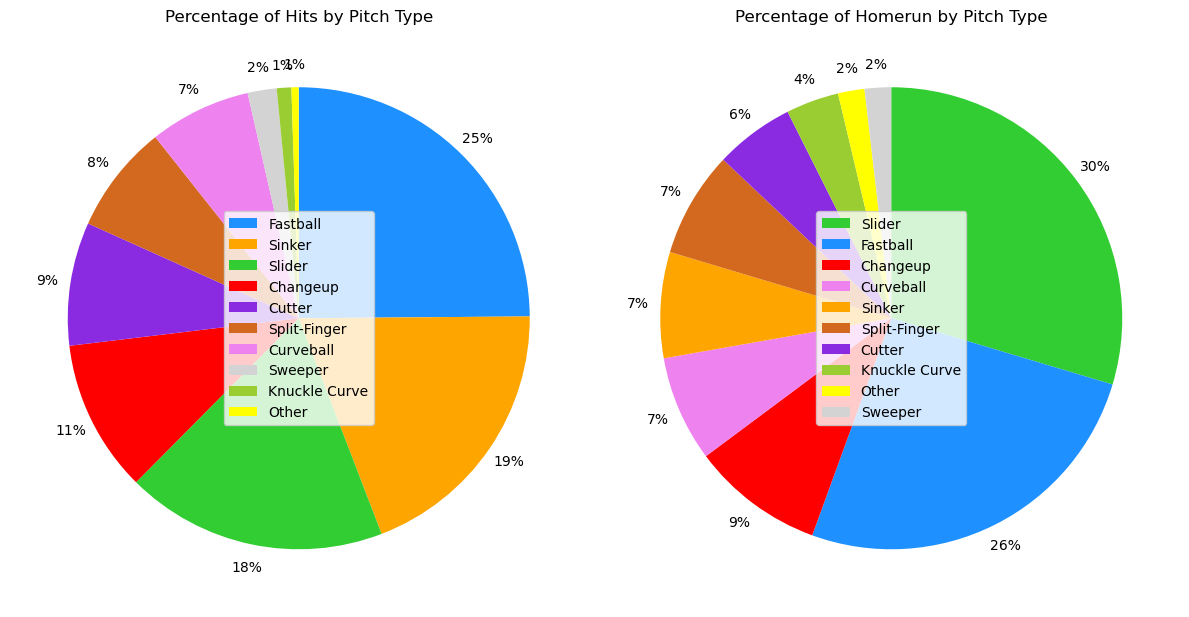

In [62]:
hits = hits.replace({"4-Seam Fastball": "Fastball"})
hits_type = hits.groupby("pitch_name")[["events"]].count().rename(columns={"events":"count"}).reset_index().sort_values(by=["count"], ascending=False)
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))
colors_hits = ["dodgerblue", "orange", "limegreen", "red", "blueviolet", "chocolate", "violet", "lightgray", "yellowgreen", "yellow"]
axes[0].pie(hits_type["count"], counterclock = False, startangle=90, autopct="%.0f%%", pctdistance=1.1, colors=colors_hits)
axes[0].legend(labels=hits_type["pitch_name"], loc="center")
axes[0].set_title("Percentage of Hits by Pitch Type")

home_run_type = hits[hits["events"] == "home_run"]
colors_homerun = ["limegreen", "dodgerblue", "red", "violet", "orange", "chocolate", "blueviolet", "yellowgreen", "yellow", "lightgray"]
home_run_type = home_run_type.groupby("pitch_name")[["events"]].count().reset_index().sort_values(by=["events"], ascending=False)
axes[1].pie(home_run_type["events"], counterclock = False, startangle=90, autopct="%.0f%%", pctdistance=1.1, colors=colors_homerun)
axes[1].legend(labels=home_run_type["pitch_name"], loc="center")
axes[1].set_title("Percentage of Homerun by Pitch Type")

plt.tight_layout()
plt.show()

### **Insights**
* **One quarter of the pitches he hit were fastballs, but that does not mean he excels at hitting them.**
* **The percentage of vertical breaking balls (Curveball, Split-Finger) is relatively lower compared to lateral breaking balls.** 
* **Slider and fastball are more likely to result in greater distance for him, as the percentage of sliders and fastballs occupies more than half.** 
* **Even though the percentage of sinkers is the second highest among the total hits, only a few of those pitches resulted in home runs.** 

### **Suggestions**
* **The first pitch should be one that is difficult to hit, primarily focused on the outside corner.**
* **When there are runners in scoring position, facing him with left-handed pitchers could minimize the risk of allowing runs.**
* **The pichers should be actively using vertical breaking balls.** 
* **The pitch selection that makes him swing at lower pitches is required.**

### **Conclusion**
In all his at-bats, types of pitches the pitchers threw prior to the outcome pitch are very important. Since this analysis aims to provide suggestions to shut him down, an intentional walk is not an ideal choice. However, he is astute, so we might want to intentionally walk him every time. He has been planning to perform both pitching and hitting next season, he might not be as sharp as he was in this season. That said, shutting him out would be significantly meaningfull and helpful for winning the game against Dodgers, who won the World Series in 2024.